In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
import random

In [40]:
def gerar_cores_aleatorias(n):
    return ["#"+''.join([random.choice('0123456789ABCDEF') for _ in range(6)]) for _ in range(n)]

In [41]:
# Função para processar GeoJSONs e salvá-los no formato desejado
def processar_geojsons(arquivos_geojson, pasta_saida='dados_processados', crs_destino=4326, formato='GeoJSON'):
    # Verificar se a pasta de saída existe, senão, criar
    if not os.path.exists(pasta_saida):
        os.makedirs(pasta_saida)
    
    geojson_list = []
    
    for arquivo in arquivos_geojson:
        # Carregar o GeoJSON
        gdf = gpd.read_file(arquivo)
        
        # Verificar se o CRS já está no formato de destino
        if gdf.crs.to_epsg() != crs_destino:
            # Transformar para coordenadas globais (EPSG:4326) somente se necessário
            gdf = gdf.to_crs(epsg=crs_destino)
        
        # Verificar e limpar geometrias inválidas ou nulas
        gdf = gdf[gdf.is_valid].dropna(subset=['geometry'])
        
        # Nome do arquivo de saída
        nome_saida = os.path.join(pasta_saida, os.path.basename(arquivo).replace('.geojson', f'_processado.{formato.lower()}'))
        
        # Salvar o arquivo no formato desejado
        if formato.lower() == 'geojson':
            gdf.to_file(nome_saida, driver='GeoJSON')
        elif formato.lower() == 'shapefile':
            gdf.to_file(nome_saida, driver='ESRI Shapefile')
        
        # Adicionar ao geojson_list
        geojson_list.append((arquivo, gdf))
    
    return geojson_list

In [42]:
# Função para plotar GeoJSONs com cores aleatórias
def plotar_geojson_com_cores_aleatorias(sp_gdf, gdf, titulo):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plotar o contorno da cidade de São Paulo
    sp_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=1)
    
    # Gerar cores aleatórias para cada feição
    num_features = len(gdf)
    cores = gerar_cores_aleatorias(num_features)
    
    # Plotar cada feição (distrito ou quadra) com uma cor aleatória
    for i, feature in gdf.iterrows():
        gdf.iloc[[i]].plot(ax=ax, color=cores[i], alpha=0.7)
    
    # Adicionar título ao gráfico
    plt.title(titulo, fontsize=15)
    plt.show()


In [43]:
# Caminho para o arquivo GeoJSON de São Paulo (contorno)
sao_paulo_geojson = 'sao_paulo_contorno.geojson'

# Carregar o GeoJSON de São Paulo (contorno)
sp_gdf = gpd.read_file(sao_paulo_geojson)

In [44]:
# Lista de arquivos GeoJSON
arquivos_geojson = [
    'distritos.geojson',
    'quadras_com_distritos.geojson',
]

# Processar os GeoJSONs e salvá-los
geojson_list = processar_geojsons(arquivos_geojson, formato='GeoJSON')

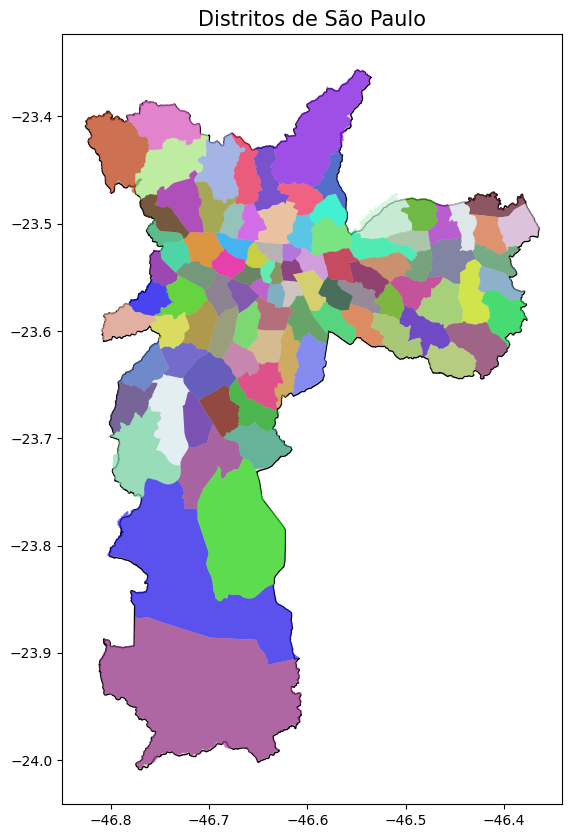

In [45]:
# Plotar primeiro os distritos
plotar_geojson_com_cores_aleatorias(sp_gdf, geojson_list[0][1], "Distritos de São Paulo")

KeyboardInterrupt: 

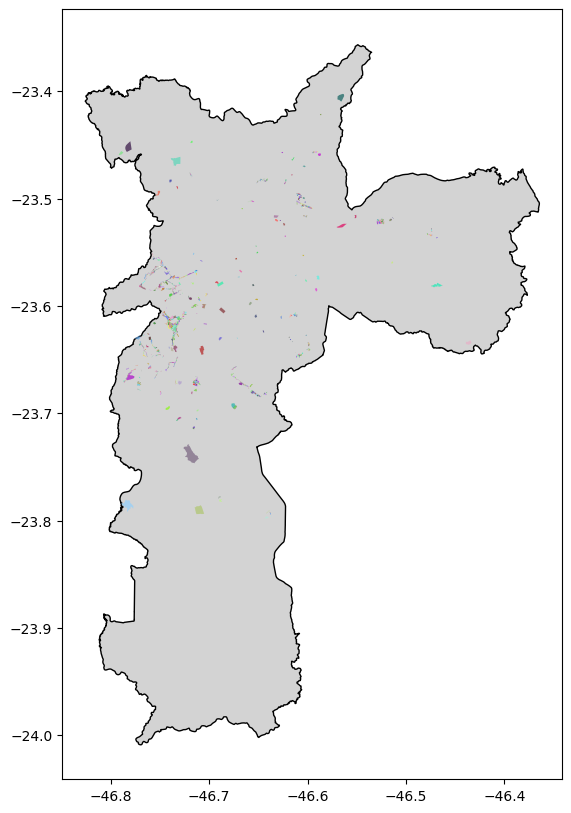

In [46]:
# Plotar depois as quadras
plotar_geojson_com_cores_aleatorias(sp_gdf, geojson_list[1][1], "Quadras de São Paulo")

## Obter outros insigths

In [47]:
def obter_crs(gdf):
    """Retorna o CRS do GeoDataFrame."""
    return gdf.crs

def obter_numero_feicoes(gdf):
    """Retorna o número de feições (features) no GeoDataFrame."""
    return len(gdf)

def obter_tipos_geometria(gdf):
    """Retorna os tipos de geometria no GeoDataFrame."""
    return gdf.geom_type.unique()

def obter_nomes_colunas(gdf):
    """Retorna os nomes das colunas no GeoDataFrame."""
    return gdf.columns.tolist()

def obter_area_total(gdf):
    """Calcula a área total das geometrias no GeoDataFrame."""
    if 'area' in gdf.columns:
        return gdf['area'].sum()
    else:
        return gdf.geometry.area.sum()

def obter_centroides(gdf):
    """Retorna os centroides de cada feição no GeoDataFrame."""
    return gdf.geometry.centroid

def obter_limite_espacial(gdf):
    """Retorna o limite espacial (bounding box) do GeoDataFrame."""
    return gdf.total_bounds  # Retorna [minx, miny, maxx, maxy]

def verificar_geometrias_invalidas(gdf):
    """Retorna um GeoDataFrame com as geometrias inválidas, se houver."""
    return gdf[~gdf.is_valid]

def obter_quantidade_por_tipo_geometria(gdf):
    """Retorna a quantidade de feições por tipo de geometria."""
    return gdf.geom_type.value_counts()

def obter_estatisticas_descritivas(gdf):
    """Retorna um resumo estatístico das colunas numéricas do GeoDataFrame."""
    return gdf.describe()


In [48]:
gdf_distritos = gpd.read_file('distritos.geojson')

gdf_quadras = gpd.read_file('quadras_com_distritos.geojson')

In [49]:
# Obter informações
crs = obter_crs(gdf_distritos)
num_feicoes = obter_numero_feicoes(gdf_distritos)
tipos_geometria = obter_tipos_geometria(gdf_distritos)
nomes_colunas = obter_nomes_colunas(gdf_distritos)
area_total = obter_area_total(gdf_distritos)
centroides = obter_centroides(gdf_distritos)
limite_espacial = obter_limite_espacial(gdf_distritos)
geometrias_invalidas = verificar_geometrias_invalidas(gdf_distritos)
quantidade_por_tipo = obter_quantidade_por_tipo_geometria(gdf_distritos)
estatisticas = obter_estatisticas_descritivas(gdf_distritos)

# Exibir resultados
print(f"CRS: {crs}")
print(f"Número de feições: {num_feicoes}")
print(f"Tipos de geometria: {tipos_geometria}")
print(f"Nomes das colunas: {nomes_colunas}")
print(f"Área total: {area_total}")
print(f"Limite espacial: {limite_espacial}")
print(f"Quantidade por tipo de geometria: {quantidade_por_tipo}")

CRS: EPSG:4326
Número de feições: 96
Tipos de geometria: ['Polygon']
Nomes das colunas: ['CLASSID', 'FEATID', 'REVISIONNU', 'NOME_DIST', 'SIGLA_DIST', 'COD_DIST', 'COD_SUB', 'DATA_CRIAC', 'USUARIO_ID', 'geometry']
Área total: 0.13519831890093376
Limite espacial: [-46.82580474 -24.00771718 -46.36465435 -23.35617698]
Quantidade por tipo de geometria: Polygon    96
Name: count, dtype: int64


C:\Users\Denil\AppData\Local\Temp\ipykernel_5532\583052954.py:22: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return gdf.geometry.area.sum()
C:\Users\Denil\AppData\Local\Temp\ipykernel_5532\583052954.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return gdf.geometry.centroid


In [50]:
# Obter informações
crs = obter_crs(gdf_quadras)
num_feicoes = obter_numero_feicoes(gdf_quadras)
tipos_geometria = obter_tipos_geometria(gdf_quadras)
nomes_colunas = obter_nomes_colunas(gdf_quadras)
area_total = obter_area_total(gdf_quadras)
centroides = obter_centroides(gdf_quadras)
limite_espacial = obter_limite_espacial(gdf_quadras)
geometrias_invalidas = verificar_geometrias_invalidas(gdf_quadras)
quantidade_por_tipo = obter_quantidade_por_tipo_geometria(gdf_quadras)
estatisticas = obter_estatisticas_descritivas(gdf_quadras)

# Exibir resultados
print(f"CRS: {crs}")
print(f"Número de feições: {num_feicoes}")
print(f"Tipos de geometria: {tipos_geometria}")
print(f"Nomes das colunas: {nomes_colunas}")
print(f"Área total: {area_total}")
print(f"Limite espacial: {limite_espacial}")
print(f"Quantidade por tipo de geometria: {quantidade_por_tipo}")

C:\Users\Denil\AppData\Local\Temp\ipykernel_5532\583052954.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return gdf.geometry.centroid


CRS: EPSG:4326
Número de feições: 49723
Tipos de geometria: ['Polygon' 'MultiPolygon']
Nomes das colunas: ['ZONA', 'area', 'geometry']
Área total: 1333390727.2997513
Limite espacial: [-46.84901585 -24.0077154  -46.36465443 -23.35617698]
Quantidade por tipo de geometria: Polygon         49721
MultiPolygon        2
Name: count, dtype: int64
